**Homework 10 Exercise 4 Exploratory Exercise and Analysis**

Homework 10, Exercise 4 asks us to look at a baseline set of hyperparameters for a model plus 8 variations.  We are asked to run a model with each of those sets of parameters and consider the observed training and validation accuracy.  I added one more variation of interest.  So, in all, I consider ten variations with each set of parameters identified by a particular `panel_index` in this discussion.

As I started to work on the problem I realized that the results depend on the hardware being used to run the experiment.  Moreover, while the use of a `seed` function allows for reproducible results when a GPU is not used, reproducibility does not seem attainable when a GPU is used.  But even though disabling the GPU allows for reproducible results on each platform, the ordering of the resulting validation accuracy numbers is inconsistent between the two platforms.

To address these concerns I decided that I would run each of ten model configurations thirty times, once on an Intel CPU without the benefit of a GPU, once on an Apple M1 CPU without the benefit of a GPU, 14 times on an Intel CPU with GPU support and 14 times on an Apple M1 CPU with GPU support.  I did not alter the seed numbers used.  I could have done so in order to yield more variety on the non GPU configurations.

In [1]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

plt.style.use("seaborn-darkgrid")
#%matplotlib inline

**Dataset**

The results of the 300 trial runs are included in the accompanying CSV file.

Let's confirm that we have 150 trials on each platform and that in each case, 10 of the 150 are without GPU support and 140 are with GPU support.

In [2]:
df = pd.read_csv("homework_10_exercise_4_results.csv")
df.shape

(160, 17)

In [3]:
df.groupby(["processor", "gpu"]).size()

processor  gpu                                                     
arm        [LogicalDevice(name='/device:GPU:0', device_type='GPU')]    140
           []                                                           10
x86_64     []                                                           10
dtype: int64

Display the first panel of ten which coincides with the M1 platform trial without GPU support.

In [4]:
df[0:10]

,panel_index,train_accuracy,validation_accuracy,test_accuracy,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,epochs,seed,processor,gpu,batch
0,0,0.8579,0.8387,0.7273,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
1,1,0.9474,0.8065,0.7273,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
2,2,0.8895,0.8065,0.7879,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
3,3,0.8789,0.8065,0.7879,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
4,4,0.8316,0.8065,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,arm,[],1657420443
5,5,0.7211,0.5806,0.5152,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,10,1234,arm,[],1657420443
6,6,0.9000,0.8710,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,10,1234,arm,[],1657420443
7,7,0.8684,0.8387,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,10,1234,arm,[],1657420443
8,8,0.9211,0.8387,0.6970,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,arm,[],1657420443
9,9,0.9316,0.8065,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,10,1234,arm,[],1657420443


**Comparing the non GPU trials.**

The next table shows repeats the table presented above, but the results are sorted from best to worst validation accuracy.  The next succeeding table shows the results for the Intel platform without GPU support, also sorted from best to worst validation accuracy.  Note that the order of the two tables is **not** the same.  The best performing configuration on one is not the same as the best performing configuration on the other.

In [5]:
df[(df.processor == "arm") & (df.gpu == "[]")].sort_values(
    "validation_accuracy", ascending=False
)

,panel_index,train_accuracy,validation_accuracy,test_accuracy,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,epochs,seed,processor,gpu,batch
6,6,0.9000,0.8710,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,10,1234,arm,[],1657420443
0,0,0.8579,0.8387,0.7273,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
7,7,0.8684,0.8387,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,10,1234,arm,[],1657420443
8,8,0.9211,0.8387,0.6970,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,arm,[],1657420443
1,1,0.9474,0.8065,0.7273,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
2,2,0.8895,0.8065,0.7879,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
3,3,0.8789,0.8065,0.7879,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
4,4,0.8316,0.8065,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,arm,[],1657420443
9,9,0.9316,0.8065,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,10,1234,arm,[],1657420443
5,5,0.7211,0.5806,0.5152,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,10,1234,arm,[],1657420443


**Distribution of Validation Accuracy Results**

Lets take a look at the distribution of validation accuracy results.  There is a clear mass at around 80%.

<AxesSubplot:>

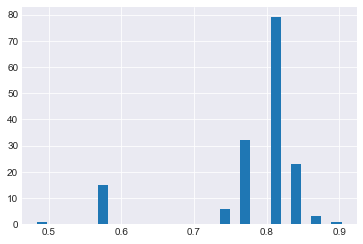

In [6]:
df.validation_accuracy.hist(bins=30)

Lets take a look at the top 30 validation accuracy percentages from the 300 trial runs (the top 10%), sorted in descending order of validation accuracy.  The distribution by parameter set is not uniform.  Our baseline set of parameters appears more frequently than any of the other parameter sets.

In [7]:
df.sort_values("validation_accuracy", ascending=False)[0:30]

,panel_index,train_accuracy,validation_accuracy,test_accuracy,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,epochs,seed,processor,gpu,batch
10,0,0.9263,0.9032,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,x86_64,[],1657421344
6,6,0.9000,0.8710,0.7879,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,10,1234,arm,[],1657420443
38,8,0.9158,0.8710,0.7576,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,10,1234,arm,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657422255
34,4,0.8316,0.8710,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,arm,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657422255
0,0,0.8579,0.8387,0.7273,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,[],1657420443
24,4,0.8579,0.8387,0.8485,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,arm,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657422087
97,7,0.9316,0.8387,0.6970,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,10,1234,arm,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657429282
94,4,0.8526,0.8387,0.8182,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,10,1234,arm,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657429282
30,0,0.9316,0.8387,0.7576,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657422255
91,1,0.9789,0.8387,0.7273,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,10,1234,arm,"[LogicalDevice(name='/device:GPU:0', device_ty...",1657429282


The following histrogram shows that our baseline set of parameters (panel index 0) appears the most frequently in the top 10%.  Parameter sets 5, 7 and 8 do not appear at all.

<AxesSubplot:>

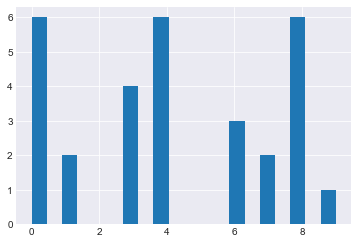

In [8]:
df.sort_values("validation_accuracy", ascending=False)[0:30]["panel_index"].hist(
    bins=20
)

**Distribution of Validation Accuracy Scores for Each Hyperparameter Set**

The following series of histograms shows the distribution of validation accuracy scores for the thirty trials of each parameter set.  Parameter set 5 is very interesting, in part because the results are low relative to the other distributions, and, in part because it appears there are really only two results, perhaps one for each platform even with the GPU.

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

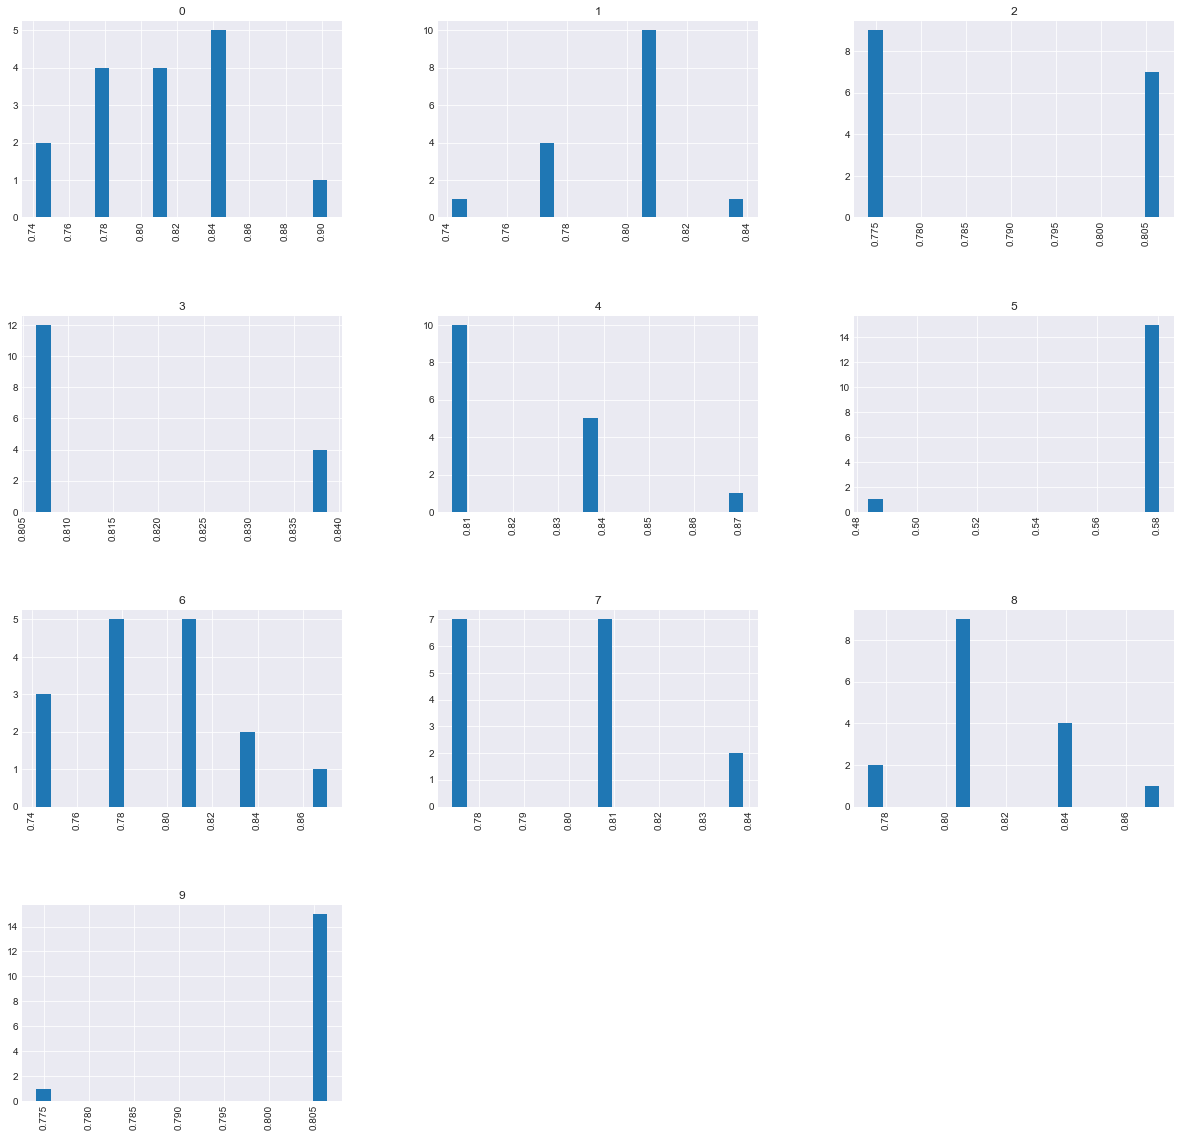

In [9]:
df["validation_accuracy"].hist(by=df["panel_index"], figsize=(20, 20), bins=20)

Let's take a closer look at set 5.  This appears to be the only set where the validation accuracy is the same for each processor without regard to the use of a GPU.  The distinctive feature of this set is the use of `SGD` as the optimizer instead of `Adam`.  It would be interesting to see how our results would vary if we ran more epochs to give `SGD` more time to converge.

In [10]:
df[df.panel_index == 5][["validation_accuracy", "processor"]].sort_values(
    "validation_accuracy"
)

,validation_accuracy,processor
15,0.4839,x86_64
5,0.5806,arm
25,0.5806,arm
35,0.5806,arm
45,0.5806,arm
55,0.5806,arm
65,0.5806,arm
75,0.5806,arm
85,0.5806,arm
95,0.5806,arm


**Validation Accuracy Mean by Hyperparameter Set**

The next table shows the mean of the validation accuracy scores by parameter set, in descending order.  By this measure, once again, our baseline set of paramters is at the top of the list.  

I find it very interesting that hyperparamter set 9 is near the top of the list and hyperparameter set 8 is near the bottom of the list.  The defining elements for those sets are whether or not the augmented images were flipped from left to right.  Our baseline code used applied a 50% probability randomizing function to determine whether or not an augmented image was flipped from left to right.  Parameter set 9 never flipped images.  It is one of the top performers.  Parameter set 8 flipped every augmented image and it was at the bottom (to be fair, in a tight pack).

**Confidence intervals to be added, it may be that the cluster is too tightly packed to matter**

In [11]:
parameter_summary = (
    df.groupby(
        [
            "panel_index",
            "kernel_size",
            "strides",
            "pool_size",
            "learning_rate",
            "optimizer",
            "brightness",
            "contrast_factor",
            "flip_on_train",
        ]
    )
    .agg(
        train_mean=("train_accuracy", "mean"),
        validation_mean=("validation_accuracy", "mean"),
    )
    .reset_index()
    .sort_values("validation_mean", ascending=False)
)
parameter_summary

,panel_index,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train,train_mean,validation_mean
4,4,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random,0.841119,0.820594
3,3,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random,0.907575,0.814550
8,8,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes,0.913162,0.814544
0,0,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,0.899019,0.806456
9,9,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no,0.890800,0.804481
1,1,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random,0.969063,0.796400
7,7,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random,0.906581,0.796394
6,6,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random,0.927644,0.792350
2,2,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random,0.914469,0.788331
5,5,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random,0.669412,0.574556


**Confidence Intervals**

Let's add confidence interval data.

We start by extracting the validation accuracy results for each set of hyperparameters.

In [12]:
validation_accuracy_results = [
    df[df.panel_index == index].validation_accuracy for index in df.panel_index.unique()
]

In [13]:
validation_accuracy_results[0]

0      0.8387
10     0.9032
20     0.8387
30     0.8387
40     0.8065
50     0.8065
60     0.7742
70     0.8065
80     0.7742
90     0.7419
100    0.7742
110    0.7419
120    0.8387
130    0.8387
140    0.7742
150    0.8065
Name: validation_accuracy, dtype: float64

In [14]:
df[df.panel_index == 0].validation_accuracy

0      0.8387
10     0.9032
20     0.8387
30     0.8387
40     0.8065
50     0.8065
60     0.7742
70     0.8065
80     0.7742
90     0.7419
100    0.7742
110    0.7419
120    0.8387
130    0.8387
140    0.7742
150    0.8065
Name: validation_accuracy, dtype: float64

Let's calculate these numbers two ways, first with the t distribution, and then, since we have 30 data points for each set, let's take advantage of the central limit theorem approach and assume that the distribution is normal (which certainly is not true for our data using `SGD`).

In [15]:
validation_accuracy_ci_t = pd.DataFrame(
    [
        st.t.interval(
            alpha=0.95, df=len(data) - 1, loc=np.mean(data), scale=st.sem(data)
        )
        for data in validation_accuracy_results
    ],
    columns=["validation_lower_bound", "validation_upper_bound"],
)
validation_accuracy_ci_t

,validation_lower_bound,validation_upper_bound
0,0.783826,0.829087
1,0.784287,0.808513
2,0.779513,0.797149
3,0.806877,0.822223
4,0.809790,0.831398
5,0.561674,0.587438
6,0.772523,0.812177
7,0.784287,0.808500
8,0.801234,0.827854
9,0.800178,0.808784


In [16]:
validation_accuracy_ci_norm = pd.DataFrame(
    [
        st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))
        for data in validation_accuracy_results
    ],
    columns=["validation_lower_bound", "validation_upper_bound"],
)
validation_accuracy_ci_norm

,validation_lower_bound,validation_upper_bound
0,0.785647,0.827266
1,0.785262,0.807538
2,0.780222,0.796440
3,0.807494,0.821606
4,0.810659,0.830528
5,0.562711,0.586402
6,0.774119,0.810581
7,0.785261,0.807526
8,0.802304,0.826783
9,0.800525,0.808438


In [17]:
parameter_summary = parameter_summary.join(validation_accuracy_ci_norm)

In [18]:
parameter_summary = parameter_summary.reindex(
    columns=[
        "panel_index",
        "train_mean",
        "validation_mean",
        "validation_lower_bound",
        "validation_upper_bound",
        "kernel_size",
        "strides",
        "pool_size",
        "learning_rate",
        "optimizer",
        "brightness",
        "contrast_factor",
        "flip_on_train",
    ]
)

In [19]:
parameter_summary

,panel_index,train_mean,validation_mean,validation_lower_bound,validation_upper_bound,kernel_size,strides,pool_size,learning_rate,optimizer,brightness,contrast_factor,flip_on_train
4,4,0.841119,0.820594,0.810659,0.830528,"(5, 5)","(1, 1)","(2, 2)",0.010,Adam,0.3,3,random
3,3,0.907575,0.814550,0.807494,0.821606,"(5, 5)","(1, 1)","(3, 3)",0.001,Adam,0.3,3,random
8,8,0.913162,0.814544,0.802304,0.826783,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,yes
0,0,0.899019,0.806456,0.785647,0.827266,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random
9,9,0.890800,0.804481,0.800525,0.808438,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,no
1,1,0.969063,0.796400,0.785262,0.807538,"(3, 3)","(1, 1)","(2, 2)",0.001,Adam,0.3,3,random
7,7,0.906581,0.796394,0.785261,0.807526,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.3,2,random
6,6,0.927644,0.792350,0.774119,0.810581,"(5, 5)","(1, 1)","(2, 2)",0.001,Adam,0.1,3,random
2,2,0.914469,0.788331,0.780222,0.796440,"(5, 5)","(2, 2)","(2, 2)",0.001,Adam,0.3,3,random
5,5,0.669412,0.574556,0.562711,0.586402,"(5, 5)","(1, 1)","(2, 2)",0.001,SGD,0.3,3,random


Text(0.5, 1.0, 'validation accuracy summary')

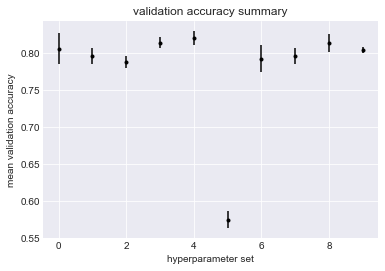

In [20]:
x = parameter_summary.panel_index
y = parameter_summary.validation_mean
dy = (
    parameter_summary.validation_upper_bound - parameter_summary.validation_lower_bound
) / 2

plt.errorbar(x, y, yerr=dy, fmt=".k")
plt.xlabel("hyperparameter set")
plt.ylabel("mean validation accuracy")
plt.title("validation accuracy summary")

Lets eliminate index 5 from the visualization

In [21]:
x = x[:-1]
y = y[:-1]
dy = dy[:-1]

**Validation Accuracy Mean Values with Confidence Interval Markings**
(for all sets of parameters other than set 5)

Text(0.5, 1.0, 'validation accuracy summary')

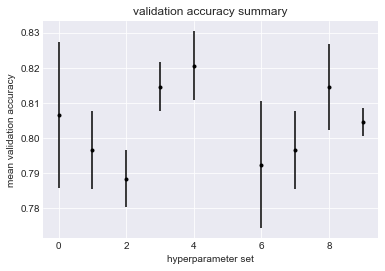

In [22]:
plt.errorbar(x, y, yerr=dy, fmt=".k")
plt.xlabel("hyperparameter set")
plt.ylabel("mean validation accuracy")
plt.title("validation accuracy summary")

**Compare Validation Accuracy Distributions Using Welch's T Test**

We can run Welch's T Test and see where we fail to reject the null hypothesis that the two distributions have equal means.

In [23]:
welch_test_results = [
    (
        x1,
        x2,
        st.ttest_ind(
            validation_accuracy_results[x1],
            validation_accuracy_results[x2],
            equal_var=False,
        )[1],
    )
    for x1, x2 in itertools.combinations(range(10), 2)
]

Lets look for results where the p value is greater then or equal to .05

In [24]:
[(x1, x2, p) for x1, x2, p in welch_test_results if p >= 0.05]

[(0, 1, 0.4122958348713863),
 (0, 2, 0.12781503993852308),
 (0, 3, 0.4794022015231141),
 (0, 4, 0.2425742980368527),
 (0, 6, 0.3257650000069595),
 (0, 7, 0.41195635884714676),
 (0, 8, 0.5176280414192345),
 (0, 9, 0.8572833587510323),
 (1, 2, 0.26094554845913753),
 (1, 6, 0.7133867373097251),
 (1, 7, 0.9993844943809386),
 (1, 9, 0.1962845534569854),
 (2, 6, 0.6970635783040255),
 (2, 7, 0.261137376763549),
 (3, 4, 0.33960809467751774),
 (3, 8, 0.9993153400709902),
 (4, 8, 0.4580301646708128),
 (6, 7, 0.7137688796407406),
 (6, 8, 0.0581704803573067),
 (6, 9, 0.22024135568534897),
 (7, 9, 0.19574331675359322),
 (8, 9, 0.1425060175047796)]

**Key Observation**

The Welch's T Test results indicate that the differences in the distributions for our four best performing sets of parameters are **not** statistically significant. So it appears that on the basis of this data, we could select any of parameter set `0`, `3`, `4` or `9`, although the `p` values suggest that sets `0` and `3` are the closest.

In [25]:
foo = parameter_summary.sort_values("panel_index")[
    ["panel_index", "train_mean", "validation_mean", "validation_lower_bound", 'validation_upper_bound']
]

In [26]:
foo.train_mean = round(foo.train_mean, 3)

In [27]:
foo.validation_mean = round(foo.validation_mean, 3)

In [28]:
foo['interval'] = round((foo.validation_upper_bound - foo.validation_lower_bound)/2, 3)

In [29]:
foo=foo[['panel_index', 'train_mean', 'validation_mean', 'interval']]

In [30]:
foo

,panel_index,train_mean,validation_mean,interval
0,0,0.899,0.806,0.021
1,1,0.969,0.796,0.011
2,2,0.914,0.788,0.008
3,3,0.908,0.815,0.007
4,4,0.841,0.821,0.010
5,5,0.669,0.575,0.012
6,6,0.928,0.792,0.018
7,7,0.907,0.796,0.011
8,8,0.913,0.815,0.012
9,9,0.891,0.804,0.004
